# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [65]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import preprocessing

In [66]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Выберем небольшую подвыборку, чтобы на ней подбрать параметры модели.

In [67]:
part_size = 100000
df_part = df.sample(part_size) 
df_part.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
350641,2005,37.78148,-122.52197,-5.85332,-24.96014,23.52085,-21.59970,0.42571,2.93985,4.20125,...,79.58226,-432.28057,21.56761,118.72709,-23.34056,-126.46398,115.58989,-23.25324,364.22535,55.52315
135556,1956,37.21894,18.68218,47.65200,9.69725,-17.50993,7.68005,-9.27506,-1.71204,10.25651,...,-18.50776,-300.76759,64.18609,-41.31006,-17.69115,-203.21672,-294.32175,-7.86828,-228.66526,-13.17534
5758,2008,46.45684,-4.67223,-6.30520,-21.85238,-12.86924,-21.06807,-30.19147,-14.57780,2.18007,...,32.48539,-93.96728,-1.41953,7.30967,23.55098,-15.61818,-1.36183,-18.72836,42.72321,-9.51389
216989,1978,46.68642,106.26050,13.93247,-16.15519,-21.72079,-23.60789,-2.62500,6.82041,6.19149,...,-1.08372,-58.03512,47.31689,-9.38680,3.93136,-2.95233,-41.75839,-4.44049,49.24288,1.55030
248968,2000,46.32067,24.67651,14.00151,21.55842,26.28058,3.91448,-13.40587,-11.20233,2.94327,...,14.68573,-92.82609,95.99966,-23.10028,-3.58285,73.55911,-36.00589,11.10995,-49.67723,-1.13409


In [6]:
pd.set_option('display.max_rows', 90) 
years = pd.DataFrame(df[0].value_counts())
years = years.reset_index()
years = years.rename(columns={'index':'year',0:'amount'})
years

,year,amount
0,2007,39404
1,2006,37534
2,2005,34952
3,2008,34760
4,2009,31038
5,2004,29607
6,2003,27382
7,2002,23451
8,2001,21590
9,2000,19285


Приведем векторы соотвествующие разным годам к одному порядку по вхождению в данные, потому как у нас есть очевидный перекос в сторону 2000-ых годов.

In [7]:
from sklearn.utils import shuffle
y_year = years['year'].to_numpy()
n_y = years['amount'].to_numpy() 
data = df
for year in y_year[n_y<6000]:
    N_b = 8500 +np.random.randint(1,1000)
    k = int(np.round(N_b/int(years[years['year']==year]['amount']))-1)
    data_app = pd.concat([df[df[0]==year]]*k,ignore_index=True)
    data = pd.concat([data,data_app],ignore_index=True)
data = shuffle(data)

In [68]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_part = df_part.iloc[:, 1:].values
y_part = df_part.iloc[:, 0].values

In [ ]:
X_b = data.iloc[:, 1:].values
y_b = data.iloc[:, 0].values

In [69]:
scaler = preprocessing.StandardScaler()
X_sc = scaler.fit_transform(X)
X_sc_part = scaler.fit_transform(X_part)
std = np.std(y)
mean = np.mean(y)
y_sc = (y-mean)/std
std_part = np.std(y_part)
mean_part = np.mean(y_part)
y_sc_part = (y_part-mean_part)/std_part


In [ ]:
X_sc_b = scaler.fit_transform(X_b)
std_b = np.std(y_b)
mean_b = np.mean(y_b)
y_sc_b = (y_b-mean_b)/std_b

In [ ]:
train_size_b = int(0.8*len(data))
X_train_b = X_sc_b[:train_size_b, :]
y_train_b = y_sc_b[:train_size_b]
X_test_b = X_sc_b[train_size_b:, :]
y_test_b = y_sc_b[train_size_b:]

In [70]:
train_size = 463715
X_train = X_sc[:train_size, :]
y_train = y_sc[:train_size]
X_test = X_sc[train_size:, :]
y_test = y_sc[train_size:]

In [71]:
train_size_part = 70000
X_train_part = X_sc_part[:train_size_part, :]
y_train_part = y_sc_part[:train_size_part]
X_test_part = X_sc_part[train_size_part:, :]
y_test_part = y_sc_part[train_size_part:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [73]:
reg1 = Ridge()
reg1.fit(X_train,y_train)
y_pred = reg1.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test*std+mean,y_pred*std +mean))
RMSE

9.510160818523268

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [74]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [75]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'sample': torch.tensor(self.x[idx, :], dtype=torch.float32),
                'target': torch.tensor(self.y[idx], dtype=torch.float32)}

In [76]:
train_set = RandomDataset(X_train,y_train)
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=5)
test_set = RandomDataset(X_test,y_test)
test_loader = torch.utils.data.DataLoader(test_set, 
                                          batch_size=1000)



In [77]:
train_set_part = RandomDataset(X_train_part,y_train_part)
train_loader_part = torch.utils.data.DataLoader(train_set_part, 
                                           batch_size=4,shuffle=True)
test_set_part = RandomDataset(X_test_part,y_test_part)
test_loader_part = torch.utils.data.DataLoader(test_set_part, 
                                          batch_size=100)

In [48]:
train_set_b = RandomDataset(X_train_b,y_train_b)
train_loader_b = torch.utils.data.DataLoader(train_set_b, 
                                           batch_size=64)
test_set_b = RandomDataset(X_test_b,y_test_b)
test_loader_b = torch.utils.data.DataLoader(test_set_b, 
                                          batch_size=1000)

In [78]:
def train(model, optimizer, criterion, train_loader, test_loader,scheduler,mean,std):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    epoch = 0
    val_loss = []
    val_epoch = []
    loss_ar = []
    val_accuracy = []
    rmse = []
    for epoch  in range(epoches):
        print("Эпоха:", epoch+1)
        for data in tqdm(train_loader):
            samp = data['sample']
            targ = data['target']
            y_pred= model(samp)
            loss = criterion(y_pred,targ)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        scheduler.step()
        if flag == 1:
            with torch.no_grad():
                t1 = torch.empty((0,1))
                t2 = torch.empty((0,1))# мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
                for test in tqdm(test_loader):
                    x_val = data['sample']
                    y_pred_val = model(x_val)
                    y_val = data['target']
                    loss_val = criterion(y_pred_val, y_val) 
                    loss_ar.append(loss_val)
                    y_val=y_val.view_as(y_pred_val)
                    t1 = torch.cat((t1,y_pred_val),0)
                    t2 = torch.cat((t2,y_val),0)
                    #print('shape y_pred:', y_pred.shape,'\n','shape y_val:',y_val.shape)
                t1_r = torch.round(t1*std+mean)
                t2_r = torch.round(t2*std+mean)
                rmse.append(float(criterion(t1_r,t2_r)))
                t = np.array((t1_r == t2_r).numpy().tolist())
                val_accuracy.append(np.mean(t))
                val_loss.append(np.mean(loss_ar))
                val_epoch.append(epoch+1)
                clear_output()
                print("Эпоха = ", epoch +1)
                print("predict",t1_r[t1_r.shape[0]-10:],"val",t2_r[t2_r.shape[0]-10:])
                fig = plt.figure(figsize=(16,20))
                ax1,ax2,ax3 = fig.subplots(3,1)
                ax1.plot(val_epoch, val_loss)
                ax1.grid()
                ax1.set_title('Loss')
                ax2.plot(val_epoch,val_accuracy,color = 'orange')
                ax2.grid()
                ax2.set_title('Accuracy')
                ax3.plot(val_epoch,rmse,color='red')
                ax3.grid()
                ax3.set_title('RMSE')
                plt.show()

def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    pred = torch.empty((0,1))
    y_te = torch.empty((0,1))
    with torch.no_grad():
        for data in tqdm(test_loader): # берем батч из трейн лоадера
            y_pred = model(data['sample'])
            loss = criterion(y_pred, data['target']) 
            pred = torch.cat((pred,y_pred),0)
            y_te = torch.cat((y_te,data['target'].view_as(y_pred)),0)
    pred = pred*std+mean
    y_te = y_te*std+mean
    return pred,y_te

In [79]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-8):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

In [327]:
model = nn.Sequential(
    nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
    nn.ReLU(),           # функция активации релу
    nn.Linear(newron,32), 
    nn.Sigmoid(),           # функция активации релу
    nn.Linear(32,1),
    #nn.ReLU(),           # функция активации релу
    #nn.Linear(512,90),
    #nn.Sigmoid(),           # функция активации релу
    #nn.Linear(32,1)
# последний слой размером 10 нейронов с выходом 1 нейронов
)
optimizer = torch.optim.SGD(model.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
criterion = RMSELoss()

In [395]:
newron = 512
lr = 0.01
epoches = 1
flag = 1

In [ ]:
train(model, optimizer, criterion, train_loader, test_loader,mean,std)

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

In [389]:
y_predict, y_te = test(model, criterion, test_loader)
y_predict

  0%|          | 0/52 [00:00<?, ?it/s]

tensor([[2001.2384],
        [2003.5657],
        [2002.4343],
        ...,
        [2001.3009],
        [2003.3923],
        [2003.0447]])

In [29]:
lr = 0.01
flag = 0
newron = 256
newron2 = 10
epoches = 1
model1 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.ReLU(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,1))
for i in range(1,15):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model1.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model1, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model1, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  1 Первый слой= 256 Второй слой= 10 RMSE= 9.132974624633789 
 Max_pred =  tensor(2005.9998) Max_test =  tensor(2010.) Min_pred =  tensor(1979.8700) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 256 Второй слой= 10 RMSE= 9.064778327941895 
 Max_pred =  tensor(2005.9451) Max_test =  tensor(2010.) Min_pred =  tensor(1977.5485) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 256 Второй слой= 10 RMSE= 9.04129695892334 
 Max_pred =  tensor(2006.2419) Max_test =  tensor(2010.) Min_pred =  tensor(1975.9695) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 256 Второй слой= 10 RMSE= 9.028653144836426 
 Max_pred =  tensor(2006.2747) Max_test =  tensor(2010.) Min_pred =  tensor(1975.3380) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 256 Второй слой= 10 RMSE= 9.020655632019043 
 Max_pred =  tensor(2006.2786) Max_test =  tensor(2010.) Min_pred =  tensor(1974.9324) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 256 Второй слой= 10 RMSE= 9.01335334777832 
 Max_pred =  tensor(2006.5116) Max_test =  tensor(2010.) Min_pred =  tensor(1974.6770) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 256 Второй слой= 10 RMSE= 9.007600784301758 
 Max_pred =  tensor(2006.5620) Max_test =  tensor(2010.) Min_pred =  tensor(1974.5875) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 256 Второй слой= 10 RMSE= 9.002983093261719 
 Max_pred =  tensor(2006.6377) Max_test =  tensor(2010.) Min_pred =  tensor(1974.4836) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 256 Второй слой= 10 RMSE= 8.999302864074707 
 Max_pred =  tensor(2006.7413) Max_test =  tensor(2010.) Min_pred =  tensor(1974.4264) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 256 Второй слой= 10 RMSE= 8.995118141174316 
 Max_pred =  tensor(2006.6877) Max_test =  tensor(2010.) Min_pred =  tensor(1974.3650) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 256 Второй слой= 10 RMSE= 8.99262523651123 
 Max_pred =  tensor(2006.6776) Max_test =  tensor(2010.) Min_pred =  tensor(1974.3136) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 256 Второй слой= 10 RMSE= 8.991333961486816 
 Max_pred =  tensor(2006.7191) Max_test =  tensor(2010.) Min_pred =  tensor(1974.1421) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  13 Первый слой= 256 Второй слой= 10 RMSE= 8.991026878356934 
 Max_pred =  tensor(2006.7722) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9873) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  14 Первый слой= 256 Второй слой= 10 RMSE= 8.992829322814941 
 Max_pred =  tensor(2006.7847) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9417) Min_test =  tensor(1927.)


In [32]:
for i in range(15,25):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model1.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model1, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model1, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  15 Первый слой= 256 Второй слой= 32 RMSE= 8.994439125061035 
 Max_pred =  tensor(2006.8427) Max_test =  tensor(2010.) Min_pred =  tensor(1973.8871) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  16 Первый слой= 256 Второй слой= 32 RMSE= 8.995132446289062 
 Max_pred =  tensor(2006.8971) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9114) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  17 Первый слой= 256 Второй слой= 32 RMSE= 8.994997024536133 
 Max_pred =  tensor(2007.0251) Max_test =  tensor(2010.) Min_pred =  tensor(1973.5854) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  18 Первый слой= 256 Второй слой= 32 RMSE= 8.997117042541504 
 Max_pred =  tensor(2007.1146) Max_test =  tensor(2010.) Min_pred =  tensor(1973.3557) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  19 Первый слой= 256 Второй слой= 32 RMSE= 9.000771522521973 
 Max_pred =  tensor(2007.1301) Max_test =  tensor(2010.) Min_pred =  tensor(1973.5016) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  20 Первый слой= 256 Второй слой= 32 RMSE= 9.006875991821289 
 Max_pred =  tensor(2007.1331) Max_test =  tensor(2010.) Min_pred =  tensor(1973.5347) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  21 Первый слой= 256 Второй слой= 32 RMSE= 9.008992195129395 
 Max_pred =  tensor(2007.2506) Max_test =  tensor(2010.) Min_pred =  tensor(1973.2401) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [30]:
lr = 0.01
flag = 0
newron = 256
newron2 = 32
epoches = 1
model2 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.ReLU(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,1))
for i in range(1,15):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model2.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model2, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model2, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  1 Первый слой= 256 Второй слой= 32 RMSE= 9.134922981262207 
 Max_pred =  tensor(2006.4421) Max_test =  tensor(2010.) Min_pred =  tensor(1976.9281) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 256 Второй слой= 32 RMSE= 9.06613540649414 
 Max_pred =  tensor(2006.4713) Max_test =  tensor(2010.) Min_pred =  tensor(1976.5778) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 256 Второй слой= 32 RMSE= 9.036856651306152 
 Max_pred =  tensor(2006.5707) Max_test =  tensor(2010.) Min_pred =  tensor(1975.7891) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 256 Второй слой= 32 RMSE= 9.023155212402344 
 Max_pred =  tensor(2006.8396) Max_test =  tensor(2010.) Min_pred =  tensor(1975.8649) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 256 Второй слой= 32 RMSE= 9.012126922607422 
 Max_pred =  tensor(2007.0228) Max_test =  tensor(2010.) Min_pred =  tensor(1975.7993) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 256 Второй слой= 32 RMSE= 9.00137710571289 
 Max_pred =  tensor(2007.1089) Max_test =  tensor(2010.) Min_pred =  tensor(1975.7230) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 256 Второй слой= 32 RMSE= 8.989994049072266 
 Max_pred =  tensor(2007.1608) Max_test =  tensor(2010.) Min_pred =  tensor(1975.7107) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 256 Второй слой= 32 RMSE= 8.982089042663574 
 Max_pred =  tensor(2007.1688) Max_test =  tensor(2010.) Min_pred =  tensor(1975.0333) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 256 Второй слой= 32 RMSE= 8.976433753967285 
 Max_pred =  tensor(2007.0905) Max_test =  tensor(2010.) Min_pred =  tensor(1974.1962) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 256 Второй слой= 32 RMSE= 8.969143867492676 
 Max_pred =  tensor(2007.1079) Max_test =  tensor(2010.) Min_pred =  tensor(1973.2683) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 256 Второй слой= 32 RMSE= 8.9630765914917 
 Max_pred =  tensor(2007.1788) Max_test =  tensor(2010.) Min_pred =  tensor(1972.7137) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 256 Второй слой= 32 RMSE= 8.956844329833984 
 Max_pred =  tensor(2007.3376) Max_test =  tensor(2010.) Min_pred =  tensor(1972.0913) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  13 Первый слой= 256 Второй слой= 32 RMSE= 8.952852249145508 
 Max_pred =  tensor(2007.5319) Max_test =  tensor(2010.) Min_pred =  tensor(1971.4360) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  14 Первый слой= 256 Второй слой= 32 RMSE= 8.94979190826416 
 Max_pred =  tensor(2007.6432) Max_test =  tensor(2010.) Min_pred =  tensor(1970.8564) Min_test =  tensor(1927.)


In [31]:
for i in range(15,21):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model2.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model2, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model2, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  15 Первый слой= 256 Второй слой= 32 RMSE= 8.94662094116211 
 Max_pred =  tensor(2007.7019) Max_test =  tensor(2010.) Min_pred =  tensor(1970.4506) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  16 Первый слой= 256 Второй слой= 32 RMSE= 8.945878982543945 
 Max_pred =  tensor(2007.5946) Max_test =  tensor(2010.) Min_pred =  tensor(1969.9343) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  17 Первый слой= 256 Второй слой= 32 RMSE= 8.944392204284668 
 Max_pred =  tensor(2007.5730) Max_test =  tensor(2010.) Min_pred =  tensor(1969.7117) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  18 Первый слой= 256 Второй слой= 32 RMSE= 8.944230079650879 
 Max_pred =  tensor(2007.7753) Max_test =  tensor(2010.) Min_pred =  tensor(1969.4993) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  19 Первый слой= 256 Второй слой= 32 RMSE= 8.945229530334473 
 Max_pred =  tensor(2007.8912) Max_test =  tensor(2010.) Min_pred =  tensor(1969.0964) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  20 Первый слой= 256 Второй слой= 32 RMSE= 8.946131706237793 
 Max_pred =  tensor(2007.9594) Max_test =  tensor(2010.) Min_pred =  tensor(1968.7155) Min_test =  tensor(1927.)


In [33]:
lr = 0.01
flag = 0
newron = 512
newron2 = 32
epoches = 1
model3 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.ReLU(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,1))
for i in range(1,25):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model3.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model3, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model3, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  1 Первый слой= 512 Второй слой= 32 RMSE= 9.130145072937012 
 Max_pred =  tensor(2006.2208) Max_test =  tensor(2010.) Min_pred =  tensor(1979.0999) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 512 Второй слой= 32 RMSE= 9.0600004196167 
 Max_pred =  tensor(2006.0649) Max_test =  tensor(2010.) Min_pred =  tensor(1974.8610) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 512 Второй слой= 32 RMSE= 9.032074928283691 
 Max_pred =  tensor(2006.1655) Max_test =  tensor(2010.) Min_pred =  tensor(1973.6014) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 512 Второй слой= 32 RMSE= 9.017040252685547 
 Max_pred =  tensor(2006.3927) Max_test =  tensor(2010.) Min_pred =  tensor(1973.4297) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 512 Второй слой= 32 RMSE= 9.002385139465332 
 Max_pred =  tensor(2006.4503) Max_test =  tensor(2010.) Min_pred =  tensor(1973.6381) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 512 Второй слой= 32 RMSE= 8.992096900939941 
 Max_pred =  tensor(2006.3632) Max_test =  tensor(2010.) Min_pred =  tensor(1973.8638) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 512 Второй слой= 32 RMSE= 8.982998847961426 
 Max_pred =  tensor(2006.2729) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9987) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 512 Второй слой= 32 RMSE= 8.977749824523926 
 Max_pred =  tensor(2006.2346) Max_test =  tensor(2010.) Min_pred =  tensor(1974.1949) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 512 Второй слой= 32 RMSE= 8.973719596862793 
 Max_pred =  tensor(2006.2485) Max_test =  tensor(2010.) Min_pred =  tensor(1974.4573) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 512 Второй слой= 32 RMSE= 8.970823287963867 
 Max_pred =  tensor(2006.2262) Max_test =  tensor(2010.) Min_pred =  tensor(1974.5697) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 512 Второй слой= 32 RMSE= 8.966075897216797 
 Max_pred =  tensor(2006.2129) Max_test =  tensor(2010.) Min_pred =  tensor(1974.0903) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 512 Второй слой= 32 RMSE= 8.965965270996094 
 Max_pred =  tensor(2006.2008) Max_test =  tensor(2010.) Min_pred =  tensor(1973.6914) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  13 Первый слой= 512 Второй слой= 32 RMSE= 8.9637451171875 
 Max_pred =  tensor(2006.2067) Max_test =  tensor(2010.) Min_pred =  tensor(1973.3893) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  14 Первый слой= 512 Второй слой= 32 RMSE= 8.963201522827148 
 Max_pred =  tensor(2006.2050) Max_test =  tensor(2010.) Min_pred =  tensor(1973.1503) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  15 Первый слой= 512 Второй слой= 32 RMSE= 8.963028907775879 
 Max_pred =  tensor(2006.2212) Max_test =  tensor(2010.) Min_pred =  tensor(1972.8396) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  16 Первый слой= 512 Второй слой= 32 RMSE= 8.961003303527832 
 Max_pred =  tensor(2006.2543) Max_test =  tensor(2010.) Min_pred =  tensor(1972.6227) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  17 Первый слой= 512 Второй слой= 32 RMSE= 8.961297988891602 
 Max_pred =  tensor(2006.2726) Max_test =  tensor(2010.) Min_pred =  tensor(1972.5420) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  18 Первый слой= 512 Второй слой= 32 RMSE= 8.964705467224121 
 Max_pred =  tensor(2006.2952) Max_test =  tensor(2010.) Min_pred =  tensor(1972.4877) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [34]:
lr = 0.01
flag = 0
newron = 512
newron2 = 10
epoches = 1
model4 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.ReLU(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,1))
for i in range(1,25):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model4.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model4, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model4, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  1 Первый слой= 512 Второй слой= 10 RMSE= 9.134913444519043 
 Max_pred =  tensor(2006.2990) Max_test =  tensor(2010.) Min_pred =  tensor(1977.1112) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 512 Второй слой= 10 RMSE= 9.076854705810547 
 Max_pred =  tensor(2006.3315) Max_test =  tensor(2010.) Min_pred =  tensor(1975.0061) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 512 Второй слой= 10 RMSE= 9.052253723144531 
 Max_pred =  tensor(2006.3640) Max_test =  tensor(2010.) Min_pred =  tensor(1974.5569) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 512 Второй слой= 10 RMSE= 9.034931182861328 
 Max_pred =  tensor(2006.5430) Max_test =  tensor(2010.) Min_pred =  tensor(1974.2574) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 512 Второй слой= 10 RMSE= 9.019302368164062 
 Max_pred =  tensor(2006.5825) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9736) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 512 Второй слой= 10 RMSE= 9.00803279876709 
 Max_pred =  tensor(2006.6146) Max_test =  tensor(2010.) Min_pred =  tensor(1973.7662) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 512 Второй слой= 10 RMSE= 8.998565673828125 
 Max_pred =  tensor(2006.6691) Max_test =  tensor(2010.) Min_pred =  tensor(1973.7556) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 512 Второй слой= 10 RMSE= 8.991120338439941 
 Max_pred =  tensor(2006.6615) Max_test =  tensor(2010.) Min_pred =  tensor(1973.4618) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 512 Второй слой= 10 RMSE= 8.985418319702148 
 Max_pred =  tensor(2006.6106) Max_test =  tensor(2010.) Min_pred =  tensor(1972.5806) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 512 Второй слой= 10 RMSE= 8.982423782348633 
 Max_pred =  tensor(2006.5479) Max_test =  tensor(2010.) Min_pred =  tensor(1971.6525) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 512 Второй слой= 10 RMSE= 8.979321479797363 
 Max_pred =  tensor(2006.5063) Max_test =  tensor(2010.) Min_pred =  tensor(1971.1007) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 512 Второй слой= 10 RMSE= 8.977932929992676 
 Max_pred =  tensor(2006.4958) Max_test =  tensor(2010.) Min_pred =  tensor(1970.6796) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  13 Первый слой= 512 Второй слой= 10 RMSE= 8.976513862609863 
 Max_pred =  tensor(2006.5508) Max_test =  tensor(2010.) Min_pred =  tensor(1970.2891) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  14 Первый слой= 512 Второй слой= 10 RMSE= 8.97780990600586 
 Max_pred =  tensor(2006.5537) Max_test =  tensor(2010.) Min_pred =  tensor(1969.9736) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  15 Первый слой= 512 Второй слой= 10 RMSE= 8.97818374633789 
 Max_pred =  tensor(2006.6139) Max_test =  tensor(2010.) Min_pred =  tensor(1969.6422) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  16 Первый слой= 512 Второй слой= 10 RMSE= 8.977531433105469 
 Max_pred =  tensor(2006.6644) Max_test =  tensor(2010.) Min_pred =  tensor(1969.1326) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  17 Первый слой= 512 Второй слой= 10 RMSE= 8.977439880371094 
 Max_pred =  tensor(2006.6648) Max_test =  tensor(2010.) Min_pred =  tensor(1968.5317) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  18 Первый слой= 512 Второй слой= 10 RMSE= 8.975878715515137 
 Max_pred =  tensor(2006.6780) Max_test =  tensor(2010.) Min_pred =  tensor(1967.7742) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  19 Первый слой= 512 Второй слой= 10 RMSE= 8.97785472869873 
 Max_pred =  tensor(2006.6720) Max_test =  tensor(2010.) Min_pred =  tensor(1967.0211) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  20 Первый слой= 512 Второй слой= 10 RMSE= 8.979331970214844 
 Max_pred =  tensor(2006.6476) Max_test =  tensor(2010.) Min_pred =  tensor(1966.2784) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [35]:
lr = 0.01
flag = 0
newron = 512
newron2 = 32
epoches = 1
model4 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.ReLU(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,1))
for i in range(1,25):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            optimizer = torch.optim.SGD(model4.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
            criterion = RMSELoss()
            train(model4, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model4, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  1 Первый слой= 512 Второй слой= 32 RMSE= 9.138195991516113 
 Max_pred =  tensor(2006.2823) Max_test =  tensor(2010.) Min_pred =  tensor(1977.0309) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 512 Второй слой= 32 RMSE= 9.074082374572754 
 Max_pred =  tensor(2005.8960) Max_test =  tensor(2010.) Min_pred =  tensor(1974.8020) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 512 Второй слой= 32 RMSE= 9.04884147644043 
 Max_pred =  tensor(2005.9275) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9000) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 512 Второй слой= 32 RMSE= 9.033535957336426 
 Max_pred =  tensor(2006.1019) Max_test =  tensor(2010.) Min_pred =  tensor(1973.7390) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 512 Второй слой= 32 RMSE= 9.021918296813965 
 Max_pred =  tensor(2006.3014) Max_test =  tensor(2010.) Min_pred =  tensor(1973.9226) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 512 Второй слой= 32 RMSE= 9.011034965515137 
 Max_pred =  tensor(2006.3954) Max_test =  tensor(2010.) Min_pred =  tensor(1974.3071) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 512 Второй слой= 32 RMSE= 9.002142906188965 
 Max_pred =  tensor(2006.4427) Max_test =  tensor(2010.) Min_pred =  tensor(1974.6097) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 512 Второй слой= 32 RMSE= 8.993936538696289 
 Max_pred =  tensor(2006.4780) Max_test =  tensor(2010.) Min_pred =  tensor(1974.9496) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 512 Второй слой= 32 RMSE= 8.985274314880371 
 Max_pred =  tensor(2006.4926) Max_test =  tensor(2010.) Min_pred =  tensor(1975.2399) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 512 Второй слой= 32 RMSE= 8.97874927520752 
 Max_pred =  tensor(2006.5050) Max_test =  tensor(2010.) Min_pred =  tensor(1975.4298) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 512 Второй слой= 32 RMSE= 8.972738265991211 
 Max_pred =  tensor(2006.5607) Max_test =  tensor(2010.) Min_pred =  tensor(1975.2424) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 512 Второй слой= 32 RMSE= 8.968538284301758 
 Max_pred =  tensor(2006.5836) Max_test =  tensor(2010.) Min_pred =  tensor(1975.0297) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  13 Первый слой= 512 Второй слой= 32 RMSE= 8.96423053741455 
 Max_pred =  tensor(2006.6080) Max_test =  tensor(2010.) Min_pred =  tensor(1974.6831) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  14 Первый слой= 512 Второй слой= 32 RMSE= 8.961003303527832 
 Max_pred =  tensor(2006.6346) Max_test =  tensor(2010.) Min_pred =  tensor(1974.4232) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  15 Первый слой= 512 Второй слой= 32 RMSE= 8.958762168884277 
 Max_pred =  tensor(2006.6808) Max_test =  tensor(2010.) Min_pred =  tensor(1974.2960) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  16 Первый слой= 512 Второй слой= 32 RMSE= 8.957938194274902 
 Max_pred =  tensor(2006.6644) Max_test =  tensor(2010.) Min_pred =  tensor(1974.0034) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  17 Первый слой= 512 Второй слой= 32 RMSE= 8.956968307495117 
 Max_pred =  tensor(2006.7253) Max_test =  tensor(2010.) Min_pred =  tensor(1973.7760) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  18 Первый слой= 512 Второй слой= 32 RMSE= 8.956514358520508 
 Max_pred =  tensor(2006.7625) Max_test =  tensor(2010.) Min_pred =  tensor(1973.4769) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  19 Первый слой= 512 Второй слой= 32 RMSE= 8.957873344421387 
 Max_pred =  tensor(2006.7886) Max_test =  tensor(2010.) Min_pred =  tensor(1973.1274) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  20 Первый слой= 512 Второй слой= 32 RMSE= 8.957137107849121 
 Max_pred =  tensor(2006.8103) Max_test =  tensor(2010.) Min_pred =  tensor(1972.8228) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  21 Первый слой= 512 Второй слой= 32 RMSE= 8.958409309387207 
 Max_pred =  tensor(2006.8215) Max_test =  tensor(2010.) Min_pred =  tensor(1972.3854) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [37]:
lr = 0.001
flag = 0
newron = 180
newron2 = 90
epoches = 1
model5 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.ReLU(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,32),
nn.ReLU(),
nn.Linear(32,1))
optimizer = torch.optim.SGD(model5.parameters(), lr=lr) # создаем оптимизатор и передаем туда параметры модели
criterion = RMSELoss()
for i in range(1,25):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            train(model5, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model5, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  1 Первый слой= 180 Второй слой= 90 RMSE= 9.655988693237305 
 Max_pred =  tensor(2012.4178) Max_test =  tensor(2010.) Min_pred =  tensor(1988.5549) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 180 Второй слой= 90 RMSE= 9.277857780456543 
 Max_pred =  tensor(2008.7806) Max_test =  tensor(2010.) Min_pred =  tensor(1982.2190) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 180 Второй слой= 90 RMSE= 9.198732376098633 
 Max_pred =  tensor(2007.4706) Max_test =  tensor(2010.) Min_pred =  tensor(1979.3624) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 180 Второй слой= 90 RMSE= 9.160552978515625 
 Max_pred =  tensor(2007.1698) Max_test =  tensor(2010.) Min_pred =  tensor(1978.2980) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 180 Второй слой= 90 RMSE= 9.1286039352417 
 Max_pred =  tensor(2006.9242) Max_test =  tensor(2010.) Min_pred =  tensor(1977.5897) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 180 Второй слой= 90 RMSE= 9.100848197937012 
 Max_pred =  tensor(2006.7408) Max_test =  tensor(2010.) Min_pred =  tensor(1977.2122) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 180 Второй слой= 90 RMSE= 9.087028503417969 
 Max_pred =  tensor(2006.6536) Max_test =  tensor(2010.) Min_pred =  tensor(1977.1429) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 180 Второй слой= 90 RMSE= 9.0701904296875 
 Max_pred =  tensor(2006.6010) Max_test =  tensor(2010.) Min_pred =  tensor(1977.2898) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 180 Второй слой= 90 RMSE= 9.062416076660156 
 Max_pred =  tensor(2006.5591) Max_test =  tensor(2010.) Min_pred =  tensor(1977.4216) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 180 Второй слой= 90 RMSE= 9.06017017364502 
 Max_pred =  tensor(2006.5605) Max_test =  tensor(2010.) Min_pred =  tensor(1977.5474) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 180 Второй слой= 90 RMSE= 9.045398712158203 
 Max_pred =  tensor(2006.7173) Max_test =  tensor(2010.) Min_pred =  tensor(1977.7587) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 180 Второй слой= 90 RMSE= 9.044300079345703 
 Max_pred =  tensor(2006.7725) Max_test =  tensor(2010.) Min_pred =  tensor(1977.5951) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  13 Первый слой= 180 Второй слой= 90 RMSE= 9.03742790222168 
 Max_pred =  tensor(2006.8859) Max_test =  tensor(2010.) Min_pred =  tensor(1976.8225) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  14 Первый слой= 180 Второй слой= 90 RMSE= 9.030003547668457 
 Max_pred =  tensor(2006.9001) Max_test =  tensor(2010.) Min_pred =  tensor(1976.1827) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  15 Первый слой= 180 Второй слой= 90 RMSE= 9.030561447143555 
 Max_pred =  tensor(2006.7698) Max_test =  tensor(2010.) Min_pred =  tensor(1975.6219) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  16 Первый слой= 180 Второй слой= 90 RMSE= 9.027970314025879 
 Max_pred =  tensor(2006.7635) Max_test =  tensor(2010.) Min_pred =  tensor(1975.1425) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  17 Первый слой= 180 Второй слой= 90 RMSE= 9.022103309631348 
 Max_pred =  tensor(2006.7896) Max_test =  tensor(2010.) Min_pred =  tensor(1974.6813) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  18 Первый слой= 180 Второй слой= 90 RMSE= 9.024771690368652 
 Max_pred =  tensor(2006.7499) Max_test =  tensor(2010.) Min_pred =  tensor(1974.2599) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  19 Первый слой= 180 Второй слой= 90 RMSE= 9.025237083435059 
 Max_pred =  tensor(2006.7281) Max_test =  tensor(2010.) Min_pred =  tensor(1973.8899) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  20 Первый слой= 180 Второй слой= 90 RMSE= 9.021617889404297 
 Max_pred =  tensor(2006.7576) Max_test =  tensor(2010.) Min_pred =  tensor(1973.4860) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  21 Первый слой= 180 Второй слой= 90 RMSE= 9.014992713928223 
 Max_pred =  tensor(2006.7814) Max_test =  tensor(2010.) Min_pred =  tensor(1973.0258) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  22 Первый слой= 180 Второй слой= 90 RMSE= 9.013853073120117 
 Max_pred =  tensor(2006.7506) Max_test =  tensor(2010.) Min_pred =  tensor(1972.7413) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  23 Первый слой= 180 Второй слой= 90 RMSE= 9.010344505310059 
 Max_pred =  tensor(2006.7246) Max_test =  tensor(2010.) Min_pred =  tensor(1972.4965) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  24 Первый слой= 180 Второй слой= 90 RMSE= 9.014690399169922 
 Max_pred =  tensor(2006.7495) Max_test =  tensor(2010.) Min_pred =  tensor(1972.1342) Min_test =  tensor(1927.)


In [38]:
for i in range(25,50):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            train(model5, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model5, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  25 Первый слой= 180 Второй слой= 90 RMSE= 9.007956504821777 
 Max_pred =  tensor(2006.7606) Max_test =  tensor(2010.) Min_pred =  tensor(1971.7671) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  26 Первый слой= 180 Второй слой= 90 RMSE= 9.00637435913086 
 Max_pred =  tensor(2006.6957) Max_test =  tensor(2010.) Min_pred =  tensor(1971.4810) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  27 Первый слой= 180 Второй слой= 90 RMSE= 9.004676818847656 
 Max_pred =  tensor(2006.6614) Max_test =  tensor(2010.) Min_pred =  tensor(1971.1528) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  28 Первый слой= 180 Второй слой= 90 RMSE= 9.001628875732422 
 Max_pred =  tensor(2006.6860) Max_test =  tensor(2010.) Min_pred =  tensor(1970.7700) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  29 Первый слой= 180 Второй слой= 90 RMSE= 9.0026273727417 
 Max_pred =  tensor(2006.6726) Max_test =  tensor(2010.) Min_pred =  tensor(1970.5300) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  30 Первый слой= 180 Второй слой= 90 RMSE= 9.002809524536133 
 Max_pred =  tensor(2006.6221) Max_test =  tensor(2010.) Min_pred =  tensor(1970.3766) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  31 Первый слой= 180 Второй слой= 90 RMSE= 9.00161361694336 
 Max_pred =  tensor(2006.6237) Max_test =  tensor(2010.) Min_pred =  tensor(1970.2781) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  32 Первый слой= 180 Второй слой= 90 RMSE= 9.001616477966309 
 Max_pred =  tensor(2006.6123) Max_test =  tensor(2010.) Min_pred =  tensor(1970.0958) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  33 Первый слой= 180 Второй слой= 90 RMSE= 8.99977970123291 
 Max_pred =  tensor(2006.6047) Max_test =  tensor(2010.) Min_pred =  tensor(1969.7789) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  34 Первый слой= 180 Второй слой= 90 RMSE= 8.99667739868164 
 Max_pred =  tensor(2006.5784) Max_test =  tensor(2010.) Min_pred =  tensor(1969.5908) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  35 Первый слой= 180 Второй слой= 90 RMSE= 8.994258880615234 
 Max_pred =  tensor(2006.5481) Max_test =  tensor(2010.) Min_pred =  tensor(1969.4623) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  36 Первый слой= 180 Второй слой= 90 RMSE= 8.99509334564209 
 Max_pred =  tensor(2006.5472) Max_test =  tensor(2010.) Min_pred =  tensor(1969.3638) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  37 Первый слой= 180 Второй слой= 90 RMSE= 8.994183540344238 
 Max_pred =  tensor(2006.5054) Max_test =  tensor(2010.) Min_pred =  tensor(1969.1886) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  38 Первый слой= 180 Второй слой= 90 RMSE= 8.994412422180176 
 Max_pred =  tensor(2006.5027) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2822) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  39 Первый слой= 180 Второй слой= 90 RMSE= 8.990409851074219 
 Max_pred =  tensor(2006.4902) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2513) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  40 Первый слой= 180 Второй слой= 90 RMSE= 8.988945007324219 
 Max_pred =  tensor(2006.4462) Max_test =  tensor(2010.) Min_pred =  tensor(1969.1902) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  41 Первый слой= 180 Второй слой= 90 RMSE= 8.988144874572754 
 Max_pred =  tensor(2006.4572) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2612) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  42 Первый слой= 180 Второй слой= 90 RMSE= 8.989860534667969 
 Max_pred =  tensor(2006.4407) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2429) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  43 Первый слой= 180 Второй слой= 90 RMSE= 8.991083145141602 
 Max_pred =  tensor(2006.4332) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2710) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  44 Первый слой= 180 Второй слой= 90 RMSE= 8.98668384552002 
 Max_pred =  tensor(2006.4216) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2079) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  45 Первый слой= 180 Второй слой= 90 RMSE= 8.985919952392578 
 Max_pred =  tensor(2006.4155) Max_test =  tensor(2010.) Min_pred =  tensor(1969.2672) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  46 Первый слой= 180 Второй слой= 90 RMSE= 8.98373031616211 
 Max_pred =  tensor(2006.4017) Max_test =  tensor(2010.) Min_pred =  tensor(1969.0448) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  47 Первый слой= 180 Второй слой= 90 RMSE= 8.984485626220703 
 Max_pred =  tensor(2006.3951) Max_test =  tensor(2010.) Min_pred =  tensor(1968.9336) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  48 Первый слой= 180 Второй слой= 90 RMSE= 8.98286247253418 
 Max_pred =  tensor(2006.3927) Max_test =  tensor(2010.) Min_pred =  tensor(1968.6504) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  49 Первый слой= 180 Второй слой= 90 RMSE= 8.986272811889648 
 Max_pred =  tensor(2006.3632) Max_test =  tensor(2010.) Min_pred =  tensor(1968.3329) Min_test =  tensor(1927.)


In [39]:
for i in range(50,100):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            train(model5, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model5, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  50 Первый слой= 180 Второй слой= 90 RMSE= 8.982806205749512 
 Max_pred =  tensor(2006.3754) Max_test =  tensor(2010.) Min_pred =  tensor(1968.1028) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  51 Первый слой= 180 Второй слой= 90 RMSE= 8.982953071594238 
 Max_pred =  tensor(2006.3729) Max_test =  tensor(2010.) Min_pred =  tensor(1967.7894) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  52 Первый слой= 180 Второй слой= 90 RMSE= 8.985869407653809 
 Max_pred =  tensor(2006.3715) Max_test =  tensor(2010.) Min_pred =  tensor(1967.8149) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  53 Первый слой= 180 Второй слой= 90 RMSE= 8.981310844421387 
 Max_pred =  tensor(2006.3898) Max_test =  tensor(2010.) Min_pred =  tensor(1967.4221) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  54 Первый слой= 180 Второй слой= 90 RMSE= 8.984293937683105 
 Max_pred =  tensor(2006.4039) Max_test =  tensor(2010.) Min_pred =  tensor(1967.0955) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  55 Первый слой= 180 Второй слой= 90 RMSE= 8.982263565063477 
 Max_pred =  tensor(2006.4337) Max_test =  tensor(2010.) Min_pred =  tensor(1966.6251) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  56 Первый слой= 180 Второй слой= 90 RMSE= 8.986961364746094 
 Max_pred =  tensor(2006.4103) Max_test =  tensor(2010.) Min_pred =  tensor(1966.4089) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  57 Первый слой= 180 Второй слой= 90 RMSE= 8.98879623413086 
 Max_pred =  tensor(2006.4493) Max_test =  tensor(2010.) Min_pred =  tensor(1966.2833) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  58 Первый слой= 180 Второй слой= 90 RMSE= 8.989189147949219 
 Max_pred =  tensor(2006.4678) Max_test =  tensor(2010.) Min_pred =  tensor(1966.3170) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  59 Первый слой= 180 Второй слой= 90 RMSE= 8.98867130279541 
 Max_pred =  tensor(2006.4746) Max_test =  tensor(2010.) Min_pred =  tensor(1966.1536) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  60 Первый слой= 180 Второй слой= 90 RMSE= 8.98824691772461 
 Max_pred =  tensor(2006.4912) Max_test =  tensor(2010.) Min_pred =  tensor(1966.0679) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  61 Первый слой= 180 Второй слой= 90 RMSE= 8.987796783447266 
 Max_pred =  tensor(2006.5105) Max_test =  tensor(2010.) Min_pred =  tensor(1966.0342) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  62 Первый слой= 180 Второй слой= 90 RMSE= 8.985732078552246 
 Max_pred =  tensor(2006.5111) Max_test =  tensor(2010.) Min_pred =  tensor(1965.9115) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  63 Первый слой= 180 Второй слой= 90 RMSE= 8.9873046875 
 Max_pred =  tensor(2006.5187) Max_test =  tensor(2010.) Min_pred =  tensor(1965.8054) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  64 Первый слой= 180 Второй слой= 90 RMSE= 8.987137794494629 
 Max_pred =  tensor(2006.5038) Max_test =  tensor(2010.) Min_pred =  tensor(1965.9120) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  65 Первый слой= 180 Второй слой= 90 RMSE= 8.981485366821289 
 Max_pred =  tensor(2006.5233) Max_test =  tensor(2010.) Min_pred =  tensor(1965.8474) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  66 Первый слой= 180 Второй слой= 90 RMSE= 8.982760429382324 
 Max_pred =  tensor(2006.5187) Max_test =  tensor(2010.) Min_pred =  tensor(1965.8228) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  67 Первый слой= 180 Второй слой= 90 RMSE= 8.985224723815918 
 Max_pred =  tensor(2006.5048) Max_test =  tensor(2010.) Min_pred =  tensor(1965.8357) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  68 Первый слой= 180 Второй слой= 90 RMSE= 8.982179641723633 
 Max_pred =  tensor(2006.5203) Max_test =  tensor(2010.) Min_pred =  tensor(1965.7466) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  69 Первый слой= 180 Второй слой= 90 RMSE= 8.984776496887207 
 Max_pred =  tensor(2006.5199) Max_test =  tensor(2010.) Min_pred =  tensor(1965.6046) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  70 Первый слой= 180 Второй слой= 90 RMSE= 8.9860200881958 
 Max_pred =  tensor(2006.5358) Max_test =  tensor(2010.) Min_pred =  tensor(1965.3333) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  71 Первый слой= 180 Второй слой= 90 RMSE= 8.98612117767334 
 Max_pred =  tensor(2006.5364) Max_test =  tensor(2010.) Min_pred =  tensor(1965.2040) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  72 Первый слой= 180 Второй слой= 90 RMSE= 8.983437538146973 
 Max_pred =  tensor(2006.5367) Max_test =  tensor(2010.) Min_pred =  tensor(1965.0084) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  73 Первый слой= 180 Второй слой= 90 RMSE= 8.980192184448242 
 Max_pred =  tensor(2006.5623) Max_test =  tensor(2010.) Min_pred =  tensor(1964.8695) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  74 Первый слой= 180 Второй слой= 90 RMSE= 8.980147361755371 
 Max_pred =  tensor(2006.5756) Max_test =  tensor(2010.) Min_pred =  tensor(1964.6741) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  75 Первый слой= 180 Второй слой= 90 RMSE= 8.977701187133789 
 Max_pred =  tensor(2006.6064) Max_test =  tensor(2010.) Min_pred =  tensor(1964.6627) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  76 Первый слой= 180 Второй слой= 90 RMSE= 8.978590965270996 
 Max_pred =  tensor(2006.6245) Max_test =  tensor(2010.) Min_pred =  tensor(1964.4659) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  77 Первый слой= 180 Второй слой= 90 RMSE= 8.977819442749023 
 Max_pred =  tensor(2006.6364) Max_test =  tensor(2010.) Min_pred =  tensor(1964.4543) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  78 Первый слой= 180 Второй слой= 90 RMSE= 8.980315208435059 
 Max_pred =  tensor(2006.6482) Max_test =  tensor(2010.) Min_pred =  tensor(1964.4423) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  79 Первый слой= 180 Второй слой= 90 RMSE= 8.980265617370605 
 Max_pred =  tensor(2006.6735) Max_test =  tensor(2010.) Min_pred =  tensor(1964.3892) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  80 Первый слой= 180 Второй слой= 90 RMSE= 8.9834623336792 
 Max_pred =  tensor(2006.6747) Max_test =  tensor(2010.) Min_pred =  tensor(1964.3165) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  81 Первый слой= 180 Второй слой= 90 RMSE= 8.98013973236084 
 Max_pred =  tensor(2006.6942) Max_test =  tensor(2010.) Min_pred =  tensor(1964.3295) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  82 Первый слой= 180 Второй слой= 90 RMSE= 8.979973793029785 
 Max_pred =  tensor(2006.7028) Max_test =  tensor(2010.) Min_pred =  tensor(1964.2980) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  83 Первый слой= 180 Второй слой= 90 RMSE= 8.98049259185791 
 Max_pred =  tensor(2006.7098) Max_test =  tensor(2010.) Min_pred =  tensor(1964.1832) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  84 Первый слой= 180 Второй слой= 90 RMSE= 8.980594635009766 
 Max_pred =  tensor(2006.7151) Max_test =  tensor(2010.) Min_pred =  tensor(1964.1973) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  85 Первый слой= 180 Второй слой= 90 RMSE= 8.985716819763184 
 Max_pred =  tensor(2006.7163) Max_test =  tensor(2010.) Min_pred =  tensor(1964.4136) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  86 Первый слой= 180 Второй слой= 90 RMSE= 8.986770629882812 
 Max_pred =  tensor(2006.7241) Max_test =  tensor(2010.) Min_pred =  tensor(1964.2114) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  87 Первый слой= 180 Второй слой= 90 RMSE= 8.985841751098633 
 Max_pred =  tensor(2006.7357) Max_test =  tensor(2010.) Min_pred =  tensor(1964.1896) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  88 Первый слой= 180 Второй слой= 90 RMSE= 8.987872123718262 
 Max_pred =  tensor(2006.7626) Max_test =  tensor(2010.) Min_pred =  tensor(1964.1353) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  89 Первый слой= 180 Второй слой= 90 RMSE= 8.986665725708008 
 Max_pred =  tensor(2006.7754) Max_test =  tensor(2010.) Min_pred =  tensor(1963.8741) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  90 Первый слой= 180 Второй слой= 90 RMSE= 8.991714477539062 
 Max_pred =  tensor(2006.7814) Max_test =  tensor(2010.) Min_pred =  tensor(1963.8146) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  91 Первый слой= 180 Второй слой= 90 RMSE= 8.991108894348145 
 Max_pred =  tensor(2006.7972) Max_test =  tensor(2010.) Min_pred =  tensor(1963.9808) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  92 Первый слой= 180 Второй слой= 90 RMSE= 8.9924898147583 
 Max_pred =  tensor(2006.7908) Max_test =  tensor(2010.) Min_pred =  tensor(1963.9850) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  93 Первый слой= 180 Второй слой= 90 RMSE= 8.99040699005127 
 Max_pred =  tensor(2006.8010) Max_test =  tensor(2010.) Min_pred =  tensor(1963.5002) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  94 Первый слой= 180 Второй слой= 90 RMSE= 8.993760108947754 
 Max_pred =  tensor(2006.8212) Max_test =  tensor(2010.) Min_pred =  tensor(1963.3407) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  95 Первый слой= 180 Второй слой= 90 RMSE= 8.991867065429688 
 Max_pred =  tensor(2006.8184) Max_test =  tensor(2010.) Min_pred =  tensor(1963.2594) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  96 Первый слой= 180 Второй слой= 90 RMSE= 8.988897323608398 
 Max_pred =  tensor(2006.8469) Max_test =  tensor(2010.) Min_pred =  tensor(1963.1759) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  97 Первый слой= 180 Второй слой= 90 RMSE= 8.990941047668457 
 Max_pred =  tensor(2006.8633) Max_test =  tensor(2010.) Min_pred =  tensor(1963.2218) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  98 Первый слой= 180 Второй слой= 90 RMSE= 8.994271278381348 
 Max_pred =  tensor(2006.8690) Max_test =  tensor(2010.) Min_pred =  tensor(1963.3763) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  99 Первый слой= 180 Второй слой= 90 RMSE= 8.997037887573242 
 Max_pred =  tensor(2006.8922) Max_test =  tensor(2010.) Min_pred =  tensor(1963.2709) Min_test =  tensor(1927.)


In [40]:
for i in range(100,200):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            train(model5, optimizer, criterion, train_loader, test_loader,mean,std)
            y_predict, y_te = test(model5, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  100 Первый слой= 180 Второй слой= 90 RMSE= 8.995126724243164 
 Max_pred =  tensor(2006.9153) Max_test =  tensor(2010.) Min_pred =  tensor(1963.2637) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  101 Первый слой= 180 Второй слой= 90 RMSE= 8.994458198547363 
 Max_pred =  tensor(2006.9414) Max_test =  tensor(2010.) Min_pred =  tensor(1963.2502) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  102 Первый слой= 180 Второй слой= 90 RMSE= 8.998403549194336 
 Max_pred =  tensor(2006.9626) Max_test =  tensor(2010.) Min_pred =  tensor(1963.1722) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  103 Первый слой= 180 Второй слой= 90 RMSE= 8.996260643005371 
 Max_pred =  tensor(2006.9843) Max_test =  tensor(2010.) Min_pred =  tensor(1963.1610) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  104 Первый слой= 180 Второй слой= 90 RMSE= 8.9957857131958 
 Max_pred =  tensor(2006.9973) Max_test =  tensor(2010.) Min_pred =  tensor(1962.9470) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  105 Первый слой= 180 Второй слой= 90 RMSE= 8.997254371643066 
 Max_pred =  tensor(2007.0133) Max_test =  tensor(2010.) Min_pred =  tensor(1962.9232) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  106 Первый слой= 180 Второй слой= 90 RMSE= 9.000235557556152 
 Max_pred =  tensor(2007.0286) Max_test =  tensor(2010.) Min_pred =  tensor(1962.9823) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  107 Первый слой= 180 Второй слой= 90 RMSE= 9.001601219177246 
 Max_pred =  tensor(2007.0449) Max_test =  tensor(2010.) Min_pred =  tensor(1962.8436) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  108 Первый слой= 180 Второй слой= 90 RMSE= 9.001258850097656 
 Max_pred =  tensor(2007.0591) Max_test =  tensor(2010.) Min_pred =  tensor(1962.9659) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  109 Первый слой= 180 Второй слой= 90 RMSE= 9.001832962036133 
 Max_pred =  tensor(2007.0687) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7682) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  110 Первый слой= 180 Второй слой= 90 RMSE= 8.998860359191895 
 Max_pred =  tensor(2007.0665) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7648) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  111 Первый слой= 180 Второй слой= 90 RMSE= 8.999578475952148 
 Max_pred =  tensor(2007.0829) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7780) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  112 Первый слой= 180 Второй слой= 90 RMSE= 9.00285530090332 
 Max_pred =  tensor(2007.0887) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7461) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  113 Первый слой= 180 Второй слой= 90 RMSE= 9.004593849182129 
 Max_pred =  tensor(2007.0894) Max_test =  tensor(2010.) Min_pred =  tensor(1962.8671) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  114 Первый слой= 180 Второй слой= 90 RMSE= 9.002140998840332 
 Max_pred =  tensor(2007.1016) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7769) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  115 Первый слой= 180 Второй слой= 90 RMSE= 9.003655433654785 
 Max_pred =  tensor(2007.1149) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7202) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  116 Первый слой= 180 Второй слой= 90 RMSE= 9.003623008728027 
 Max_pred =  tensor(2007.1171) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7472) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  117 Первый слой= 180 Второй слой= 90 RMSE= 9.005082130432129 
 Max_pred =  tensor(2007.1282) Max_test =  tensor(2010.) Min_pred =  tensor(1962.7510) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  118 Первый слой= 180 Второй слой= 90 RMSE= 9.008824348449707 
 Max_pred =  tensor(2007.1381) Max_test =  tensor(2010.) Min_pred =  tensor(1962.6674) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  119 Первый слой= 180 Второй слой= 90 RMSE= 9.007772445678711 
 Max_pred =  tensor(2007.1550) Max_test =  tensor(2010.) Min_pred =  tensor(1962.6272) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  120 Первый слой= 180 Второй слой= 90 RMSE= 9.008673667907715 
 Max_pred =  tensor(2007.1514) Max_test =  tensor(2010.) Min_pred =  tensor(1962.6334) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/77286 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [81]:
lr = 0.005
flag = 0
newron = 260
newron2 = 90
epoches = 1
model2 = nn.Sequential(
            nn.Linear(90, newron), # входной слой размером 90 нейронов с выходом в 10 нейронов
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron,newron2), 
            nn.Sigmoid(),           # функция активации релу
            nn.Linear(newron2,1))
optimizer = torch.optim.SGD(model2.parameters(), lr=lr,weight_decay=0.1) # создаем оптимизатор и передаем туда параметры модели
criterion = RMSELoss()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,gamma = 0.95)
for i in range(1,50):
    #for newron in [256,512,712,1024]:
       # for newron2 in [10,32]:
            
            
            train(model2, optimizer, criterion, train_loader, test_loader,scheduler,mean,std)
            y_predict, y_te = test(model2, criterion, test_loader)
            print("Эпоха = ",i,"Первый слой=",newron, "Второй слой=",newron2,"RMSE=",float(criterion(y_predict,y_te)),"\n",
                 "Max_pred = ",torch.max(y_predict),"Max_test = ",torch.max(y_te),
                  "Min_pred = ",torch.min(y_predict),"Min_test = ",torch.min(y_te))

Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха =  1 Первый слой= 260 Второй слой= 90 RMSE= 10.855433464050293 
 Max_pred =  tensor(1998.7723) Max_test =  tensor(2010.) Min_pred =  tensor(1998.7723) Min_test =  tensor(1927.)
Эпоха: 1


c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  2 Первый слой= 260 Второй слой= 90 RMSE= 10.85495662689209 
 Max_pred =  tensor(1998.7529) Max_test =  tensor(2010.) Min_pred =  tensor(1998.7529) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  3 Первый слой= 260 Второй слой= 90 RMSE= 10.855070114135742 
 Max_pred =  tensor(1998.7577) Max_test =  tensor(2010.) Min_pred =  tensor(1998.7577) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  4 Первый слой= 260 Второй слой= 90 RMSE= 10.852176666259766 
 Max_pred =  tensor(1998.4197) Max_test =  tensor(2010.) Min_pred =  tensor(1998.4197) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  5 Первый слой= 260 Второй слой= 90 RMSE= 10.852771759033203 
 Max_pred =  tensor(1998.3590) Max_test =  tensor(2010.) Min_pred =  tensor(1998.3590) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  6 Первый слой= 260 Второй слой= 90 RMSE= 10.851910591125488 
 Max_pred =  tensor(1998.5000) Max_test =  tensor(2010.) Min_pred =  tensor(1998.5000) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  7 Первый слой= 260 Второй слой= 90 RMSE= 10.852054595947266 
 Max_pred =  tensor(1998.5518) Max_test =  tensor(2010.) Min_pred =  tensor(1998.5518) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  8 Первый слой= 260 Второй слой= 90 RMSE= 10.852466583251953 
 Max_pred =  tensor(1998.6057) Max_test =  tensor(2010.) Min_pred =  tensor(1998.6057) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  9 Первый слой= 260 Второй слой= 90 RMSE= 10.853348731994629 
 Max_pred =  tensor(1998.6725) Max_test =  tensor(2010.) Min_pred =  tensor(1998.6725) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  10 Первый слой= 260 Второй слой= 90 RMSE= 10.855093955993652 
 Max_pred =  tensor(1998.7587) Max_test =  tensor(2010.) Min_pred =  tensor(1998.7587) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  11 Первый слой= 260 Второй слой= 90 RMSE= 10.858234405517578 
 Max_pred =  tensor(1998.8663) Max_test =  tensor(2010.) Min_pred =  tensor(1998.8663) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Эпоха =  12 Первый слой= 260 Второй слой= 90 RMSE= 10.852693557739258 
 Max_pred =  tensor(1998.3654) Max_test =  tensor(2010.) Min_pred =  tensor(1998.3654) Min_test =  tensor(1927.)
Эпоха: 1


  0%|          | 0/92743 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [390]:
torch.max(y_predict)

tensor(2006.9325)

In [391]:
torch.max(y_te)

tensor(2010.)

In [392]:
torch.min(y_predict)

tensor(1970.2572)

In [393]:
torch.min(y_te)

tensor(1927.)

In [394]:
float(criterion(y_predict,y_te))

8.957672119140625

Эпоха =  10
predict tensor([[2002.],
        [2003.],
        [1999.],
        [2003.],
        [2001.],
        [2002.],
        [2003.],
        [1999.],
        [2003.],
        [2001.]]) val tensor([[2008.],
        [2006.],
        [2007.],
        [2006.],
        [2007.],
        [2008.],
        [2006.],
        [2007.],
        [2006.],
        [2007.]])


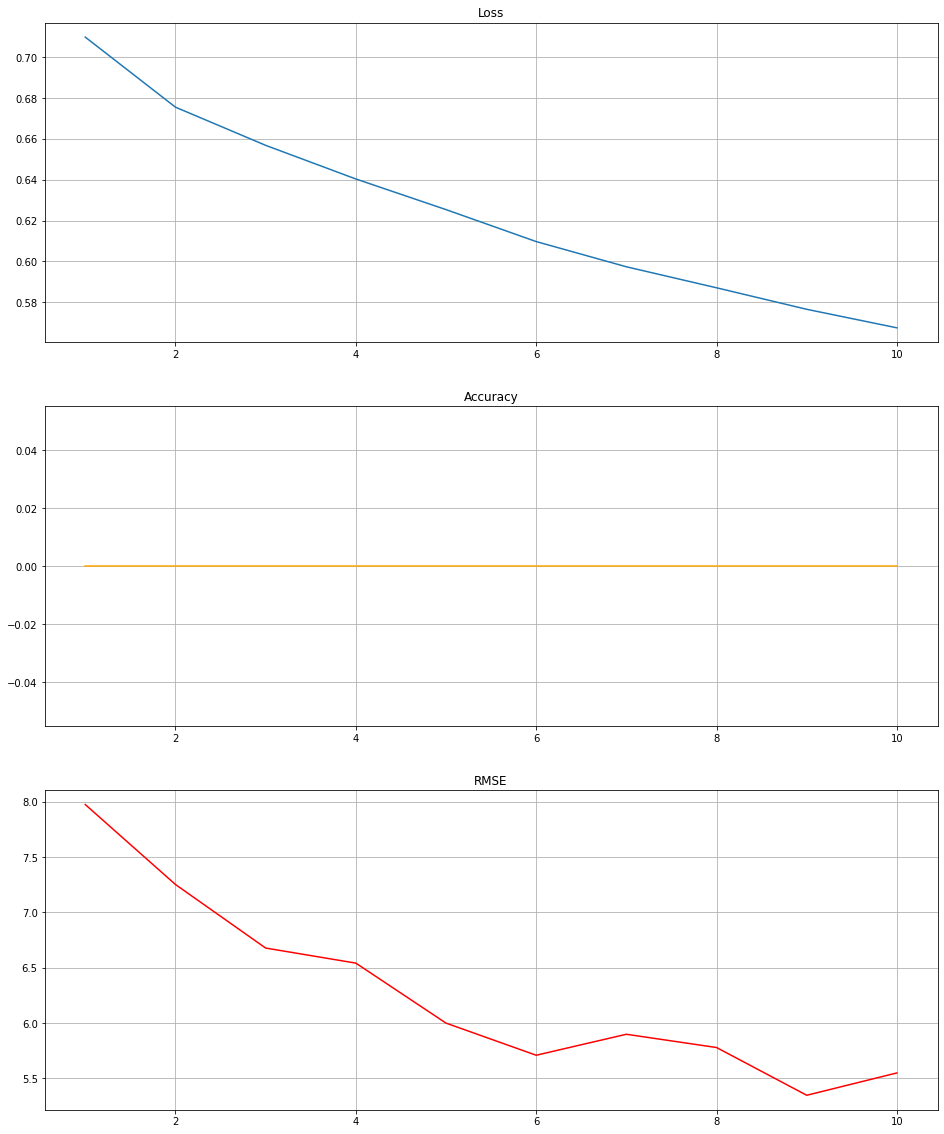

In [54]:
train(model, optimizer, criterion, train_loader, test_loader,mean,std)

In [55]:
y_predict, y_te = test(model, criterion, test_loader)
y_predict

  0%|          | 0/52 [00:00<?, ?it/s]

c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\users\крот\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[2002.5236],
        [2003.7775],
        [2003.2820],
        ...,
        [2001.3054],
        [2003.1481],
        [2003.6075]])

In [56]:
torch.max(y_predict)

tensor(2006.0072)

In [57]:
torch.max(y_te)

tensor(2010.)

In [58]:
torch.min(y_predict)

tensor(1971.1077)

In [59]:
torch.min(y_te)

tensor(1927.)

In [60]:
float(criterion(y_predict,y_te))

9.134939193725586

In [25]:
assert test(model, criterion, test_loader_part)[0].shape[0] == y_test.shape[0]

  0%|          | 0/300 [00:00<?, ?it/s]

AssertionError: 

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ